# Exploratory Data Analysis

This notebook contains the exploratory data analysis aimed at predicting technology access among low-income Seattle residents. The EDA will investigate three data frames, each comprising data points for my target variable.

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
%matplotlib inline 
import statistics 

# Libraries for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# Libraries for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Import necessary functions and classes from sklearn
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV # For splitting dataset and hyperparameter tuning
from sklearn.linear_model import LogisticRegression # For logistic regression model
from imblearn.over_sampling import SMOTE
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score # For model evaluation
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # For random forest and gradient boosting classifiers

%run '/Users/brittneynitta-lee/Desktop/Data_Science/Phase_5/Capstone_Project/notebook.ipynb'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4315 entries, 0 to 4314
Columns: 479 entries, ID to no_response
dtypes: float64(251), int64(219), object(9)
memory usage: 15.8+ MB
The respondent IDs are not the same in both dataframes.


# New CSV Import

In order to refine the survey questions I wish to concentrate on, I have generated a fresh CSV file that encompasses the essential characteristics.

In [2]:
# Create new dataframe import csv file 
new_technology_df = pd.read_csv("edited_Technology_Access_and_Adoption_Survey_2018.csv")

In [3]:
new_technology_df

,ID,samplegroup,qzip,q1,q2a_1,q2a_2,q2a_3,q2a_4,q2a_5,q2a_6,...,POV135,POV400,ethnicity,q6R,q20R,Age_range2,Age_range3,Age2_range2,Age2_range3,INCOME
0,2858,1,98125,1,1,2,3,4,0,0,...,0,1,1,5,4,5.0,4.0,5.0,4.0,2
1,2859,4,98101,1,2,3,4,0,0,0,...,0,1,1,4,5,3.0,3.0,4.0,4.0,3
2,2860,1,98144,1,0,2,3,0,0,0,...,0,1,2,4,5,5.0,4.0,NaN,NaN,1
3,2861,4,98199,1,2,3,4,6,0,0,...,0,0,1,4,5,3.0,3.0,3.0,3.0,6
4,2862,3,98112,1,0,2,3,0,0,0,...,1,1,2,9,5,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4310,90,1,98122,1,1,2,3,4,5,0,...,0,0,1,4,5,3.0,3.0,3.0,3.0,5
4311,23,1,98103,1,2,3,0,0,0,0,...,0,0,1,4,5,2.0,2.0,3.0,3.0,6
4312,24,1,98122,1,1,2,3,4,5,6,...,0,0,1,5,5,1.0,2.0,NaN,NaN,5
4313,2910,3,98199,2,0,2,3,0,0,0,...,0,0,1,8,2,7.0,5.0,NaN,NaN,0


With 85 columns and 4315 rows, the new dataset is more manageable, and I will proceed with the exploratory data analysis using this updated dataframe. The dataset is narrowed down to 11 survey questions rather than 38 questions. The new questions from the survey include internet access, devices, ways individuals use internet and demographic information about the respondents.

# Low Income Data

Once I had gone through the dataset and identified low-income households, I generated a final dataframe that only included households with an income below $74,999. Since the survey offered multiple ways of identifying low-income households, I decided to concentrate on a specific column that provided a straightforward indication of household income for the purposes of my modeling.

In [4]:
# create new dataframe for those who selected household income below $74,999
# include only values 0-10 in the q29 column
low_income_data = new_technology_df[new_technology_df['q29'].between(0, 10)]

In [5]:
low_income_data

,ID,samplegroup,qzip,q1,q2a_1,q2a_2,q2a_3,q2a_4,q2a_5,q2a_6,...,POV135,POV400,ethnicity,q6R,q20R,Age_range2,Age_range3,Age2_range2,Age2_range3,INCOME
0,2858,1,98125,1,1,2,3,4,0,0,...,0,1,1,5,4,5.0,4.0,5.0,4.0,2
1,2859,4,98101,1,2,3,4,0,0,0,...,0,1,1,4,5,3.0,3.0,4.0,4.0,3
2,2860,1,98144,1,0,2,3,0,0,0,...,0,1,2,4,5,5.0,4.0,NaN,NaN,1
4,2862,3,98112,1,0,2,3,0,0,0,...,1,1,2,9,5,NaN,NaN,NaN,NaN,1
7,2865,2,98104,1,1,2,3,0,0,0,...,0,1,1,3,5,1.0,2.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,66,1,98109,1,1,2,3,4,0,0,...,0,1,1,4,5,4.0,4.0,NaN,NaN,1
4297,150,3,98105,1,0,0,3,0,0,0,...,0,1,1,0,3,4.0,4.0,NaN,NaN,1
4301,5,2,98108,1,1,2,3,0,0,0,...,0,1,1,4,3,2.0,2.0,1.0,2.0,2
4305,11,1,98121,1,1,0,3,0,0,0,...,0,1,1,5,3,NaN,NaN,NaN,NaN,2


# Missing Values

In [6]:
# find missing values in all_data
missing_values = low_income_data.isnull().sum()

# print the number of missing values for each column
print(missing_values)

ID                0
samplegroup       0
qzip              0
q1                0
q2a_1             0
               ... 
Age_range2      303
Age_range3      303
Age2_range2    1127
Age2_range3    1127
INCOME            0
Length: 85, dtype: int64


There's a lot of missing values in the Age_range columns, I could assume that individuals did not respond so I will drop that column. 

In [7]:
low_income_data = low_income_data.drop(['Age_range2', 'Age_range3', 'Age2_range2', 'Age2_range3'], axis=1)

In [8]:
# find missing values in all_data
missing_values = low_income_data.isnull().sum()

# print the number of missing values for each column
print(missing_values)

ID             0
samplegroup    0
qzip           0
q1             0
q2a_1          0
              ..
POV400         0
ethnicity      0
q6R            0
q20R           0
INCOME         0
Length: 81, dtype: int64


In [9]:
# check if there are any NaN values in the DataFrame
print(low_income_data.isna().any().any())

True


In [10]:
# replace all NaN values with 0
low_income_data = low_income_data.fillna(0)

# check for NaN values in the DataFrame
print(low_income_data.isna().sum())

ID             0
samplegroup    0
qzip           0
q1             0
q2a_1          0
              ..
POV400         0
ethnicity      0
q6R            0
q20R           0
INCOME         0
Length: 81, dtype: int64


In [11]:
# check if there are any NaN values in the DataFrame
print(low_income_data.isna().any().any())

False


Great, there's no missing values so I can move on to creating visualizations.

# Visualizations

In [12]:
# Count the number of households who have internet access
num_internet = len(low_income_data[low_income_data['q1'] == 1])

# Count the number of households who do not have internet access
num_internet_no = len(low_income_data[low_income_data['q1'] == 2])

# Print the result of people who got the seasonal flu vaccine
print("Number of people who have internet access:", num_internet)

# Print the result of people who did not get the seasonal flu vaccine
print("Number of people who did not have internet access:", num_internet_no)

Number of people who have internet access: 1483
Number of people who did not have internet access: 171


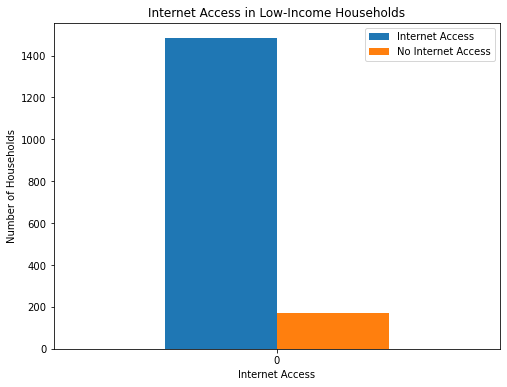

In [13]:
# Create a pandas DataFrame with the counts
df = pd.DataFrame({'Internet Access': [num_internet], 'No Internet Access': [num_internet_no]})

# Create a bar graph
ax = df.plot.bar(rot=0, figsize=(8,6))

# Set the title and axis labels
ax.set_title("Internet Access in Low-Income Households")
ax.set_xlabel("Internet Access")
ax.set_ylabel("Number of Households")

# Show the plot
plt.show()

There are 1483 households with internet access and 171 households without internet access. While the number of households with internet access is relatively low.

In [14]:
# Filter the DataFrame to include only households without internet access
no_internet_data = low_income_data[low_income_data['q1'] == 2]

In [15]:
no_internet_data

,ID,samplegroup,qzip,q1,q2a_1,q2a_2,q2a_3,q2a_4,q2a_5,q2a_6,...,q16c_22,q20,q29,POV,POV135,POV400,ethnicity,q6R,q20R,INCOME
22,3109,1,98119,2,1,0,3,0,0,0,...,5,3,2,0,0,1,1,8,3,1
29,3127,1,98107,2,7,0,0,0,0,0,...,0,0,0,0,0,0,8,8,0,0
64,3148,1,98146,2,0,0,3,0,0,0,...,5,4,4,0,0,1,1,8,2,1
71,1249,3,98107,2,7,0,0,0,0,0,...,0,5,1,1,1,1,1,8,1,1
77,3191,3,98108,2,7,0,0,0,0,0,...,5,4,2,0,0,1,2,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225,240,1,98125,2,7,0,0,0,0,0,...,5,5,0,0,0,0,1,8,1,0
4227,246,2,98133,2,2,3,0,0,0,0,...,5,1,1,1,1,1,8,8,5,1
4237,161,3,98104,2,0,0,3,0,0,0,...,0,0,3,0,0,1,3,8,0,1
4252,408,2,98104,2,0,2,0,0,0,0,...,5,1,2,0,0,1,8,8,5,1


In [16]:
# Filter the DataFrame to include only households with internet access
internet_data = low_income_data[low_income_data['q1'] == 1]

In [17]:
internet_data

,ID,samplegroup,qzip,q1,q2a_1,q2a_2,q2a_3,q2a_4,q2a_5,q2a_6,...,q16c_22,q20,q29,POV,POV135,POV400,ethnicity,q6R,q20R,INCOME
0,2858,1,98125,1,1,2,3,4,0,0,...,5,2,5,0,0,1,1,5,4,2
1,2859,4,98101,1,2,3,4,0,0,0,...,4,1,10,0,0,1,1,4,5,3
2,2860,1,98144,1,0,2,3,0,0,0,...,5,1,3,0,0,1,2,4,5,1
4,2862,3,98112,1,0,2,3,0,0,0,...,1,1,2,1,1,1,2,9,5,1
7,2865,2,98104,1,1,2,3,0,0,0,...,5,1,8,0,0,1,1,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,66,1,98109,1,1,2,3,4,0,0,...,1,1,3,0,0,1,1,4,5,1
4297,150,3,98105,1,0,0,3,0,0,0,...,5,3,2,0,0,1,1,0,3,1
4301,5,2,98108,1,1,2,3,0,0,0,...,3,3,5,0,0,1,1,4,3,2
4305,11,1,98121,1,1,0,3,0,0,0,...,5,3,6,0,0,1,1,5,3,2


# Features and target dataframe

I'm going to split the `low_income_data` dataset into two dataframes called `features` and `target`. This will help with my visualizations. 

In [18]:
# select all columns except 'q1' and store them in features dataframe
features = low_income_data.loc[:, low_income_data.columns != 'q1']

# select only the 'q1' column and store it in target dataframe
target = low_income_data['q1']

In [19]:
features

,ID,samplegroup,qzip,q2a_1,q2a_2,q2a_3,q2a_4,q2a_5,q2a_6,q2a_7,...,q16c_22,q20,q29,POV,POV135,POV400,ethnicity,q6R,q20R,INCOME
0,2858,1,98125,1,2,3,4,0,0,0.0,...,5,2,5,0,0,1,1,5,4,2
1,2859,4,98101,2,3,4,0,0,0,0.0,...,4,1,10,0,0,1,1,4,5,3
2,2860,1,98144,0,2,3,0,0,0,0.0,...,5,1,3,0,0,1,2,4,5,1
4,2862,3,98112,0,2,3,0,0,0,0.0,...,1,1,2,1,1,1,2,9,5,1
7,2865,2,98104,1,2,3,0,0,0,0.0,...,5,1,8,0,0,1,1,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,66,1,98109,1,2,3,4,0,0,0.0,...,1,1,3,0,0,1,1,4,5,1
4297,150,3,98105,0,0,3,0,0,0,0.0,...,5,3,2,0,0,1,1,0,3,1
4301,5,2,98108,1,2,3,0,0,0,0.0,...,3,3,5,0,0,1,1,4,3,2
4305,11,1,98121,1,0,3,0,0,0,0.0,...,5,3,6,0,0,1,1,5,3,2


In [20]:
target

0       1
1       1
2       1
4       1
7       1
       ..
4295    1
4297    1
4301    1
4305    1
4309    1
Name: q1, Length: 1654, dtype: int64

# Standard Scaler and Train Test Split

In [21]:
X = low_income_data.drop('q1', axis=1)
y = low_income_data['q1']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
scaler = StandardScaler()

In [23]:
# Fit the scaler on the training data and transform it
X_train_norm = scaler.fit_transform(x_train)

# Transform the test data using the scaler fitted on the training data
X_test_norm = scaler.transform(x_test)

# Baseline Model

For the baseline model, I chose to use logistic regression because the goal is to classify households in two classes: those who do not have internet access. Logistic regression is also a great baseline model for binary classification problems. 

# SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a technique for oversampling imbalanced datasets. Due to having an imbalance dataset of those who have internet and those who do not, I will utilize SMOTE (Synthetic Minority Over-sampling Technique), which is a technique for oversampling imbalanced datasets. This can help with better representation, reduced bias and no loss of information. 

In [24]:
# create instance of SMOTE class with specified random_state parameter 
smote = SMOTE(random_state=42)
# fit SMOTE with normalized training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_norm, y_train)

In [25]:
# train the baseline model on the resampled training set
baseline_model = LogisticRegression()
baseline_model.fit(X_train_resampled, y_train_resampled)

# make predictions on the training and test sets
y_train_pred = baseline_model.predict(X_train_resampled)
y_test_pred = baseline_model.predict(X_test_norm)


# print the classification report for the training set
print("Training Report Matrix")
print(classification_report(y_train_resampled, y_train_pred))

# print the classification report for the test set
print("Test Report Matrix")
print(classification_report(y_test, y_test_pred))

Training Report Matrix
              precision    recall  f1-score   support

           1       1.00      0.99      0.99      1190
           2       0.99      1.00      0.99      1190

    accuracy                           0.99      2380
   macro avg       1.00      0.99      0.99      2380
weighted avg       1.00      0.99      0.99      2380

Test Report Matrix
              precision    recall  f1-score   support

           1       0.99      0.98      0.98       293
           2       0.87      0.89      0.88        38

    accuracy                           0.97       331
   macro avg       0.93      0.94      0.93       331
weighted avg       0.97      0.97      0.97       331



The baseline model performs well on both the training and test datasets. Class 1 are households who do have internet access and class 2 are households who do not have internet access. 

The Training Report Matrix shows Class 1 has perfect precision and recall of 1.00 and 0.99, while Class 2 has a lower precision and perfect recall of 1.00. The macro avg and weighted avg f1-score for both classes are high at 0.99, which shows excellent peformance. 

The Test Report Matrix shows the same metrics for both classes on the test dataset. Class 1 has a precision of 0.99 and a recall of 0.98, while class 2 has a precision of 0.87 and a recall of 0.89. The lower performance for class 2 may indicate that the model is struggling to accurately predict this class due to a smaller number of samples or class imbalance in the test dataset. The macro avg and weighted avg f1-score are slightly lower at 0.93, indicating good  performance.

To evaluate my machine learning models, I will be precision, recall, F1-score and accuracy. 